## Day 29 — Linear Regression Case Study, Diagnostics & Regularization

This notebook is part of my **Machine Learning Learning Journey** and focuses on a
**Linear Regression case study**, covering **assumption validation**, **error diagnostics**,
**multicollinearity detection**, **feature selection**, and **regularization techniques**.

The session emphasizes **why models fail**, how to **diagnose issues**, and how to
**fix them systematically** before moving to more complex models.

---


## 1. Recap: Linear Regression Model

### Simple Linear Regression
\[
y = f(x)
\]

### Multiple Linear Regression
\[
y = f(x_1, x_2, \dots, x_n)
\]

### Model Equation
\[
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + w_0
\]

Where:
- \(w_i\) are learned parameters
- \(w_0\) is the intercept (bias)
- Output is continuous


## 2. Vector & Matrix Representation

Using homogeneous coordinates:

\[
\hat{y} = \mathbf{w}^T \mathbf{x}
\]

Where:
- \(\mathbf{x} = [x_1, x_2, \dots, x_n, 1]\)
- \(\mathbf{w} = [w_1, w_2, \dots, w_n, w_0]\)

This formulation simplifies optimization and implementation.


## 3. Ordinary Least Squares (OLS)

### Objective
Minimize squared error:

\[
\min \sum (y - \hat{y})^2
\]

### Optimization Approaches
- Closed-form solution (Normal Equation)
- Gradient Descent (preferred for large datasets)

OLS learns coefficients that best explain the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


## 4. Linear Regression Assumptions

1. **Linearity**  
   Relationship between X and y should be linear

2. **Independence of Errors**  
   Residuals should be independent

3. **Normality of Errors**  
   Errors should follow a normal distribution with mean ≈ 0

4. **Homoscedasticity**  
   Constant variance of errors

5. **No Multicollinearity**  
   Features should not be highly correlated

6. **No Significant Outliers**


In [2]:
# Example dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


## 5. Residual Analysis

Residuals:
\[
\text{Residual} = y_{actual} - y_{predicted}
\]

Used to detect:
- Non-linearity
- Heteroscedasticity
- Patterned errors


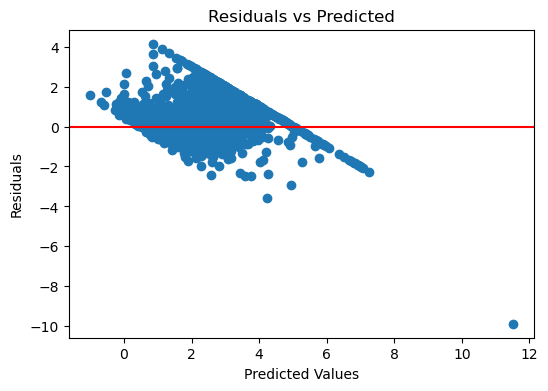

In [4]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


## 6. Error Distribution & Normality

- Errors should be normally distributed
- Mean of residuals ≈ 0
- Q–Q plot used for validation


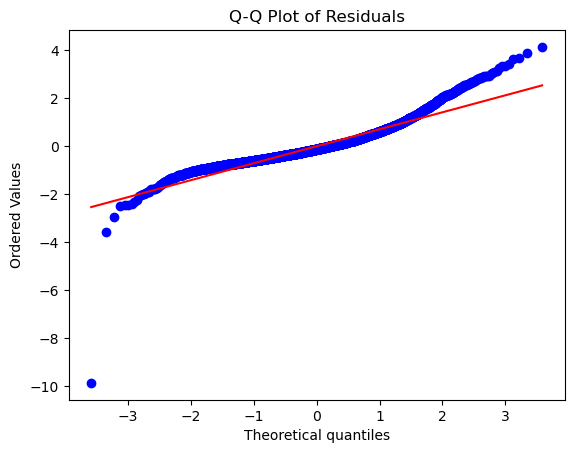

In [5]:
import scipy.stats as stats

stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


## 7. Data Transformation Techniques

Used when assumptions fail:
- Log transformation
- Square root
- Reciprocal
- Box-Cox

Goal:
- Reduce skewness
- Stabilize variance


## 8. Multicollinearity

Occurs when:
- One feature can be explained by other features

Effects:
- Inflated variance of coefficients
- Unstable models
- Poor interpretability


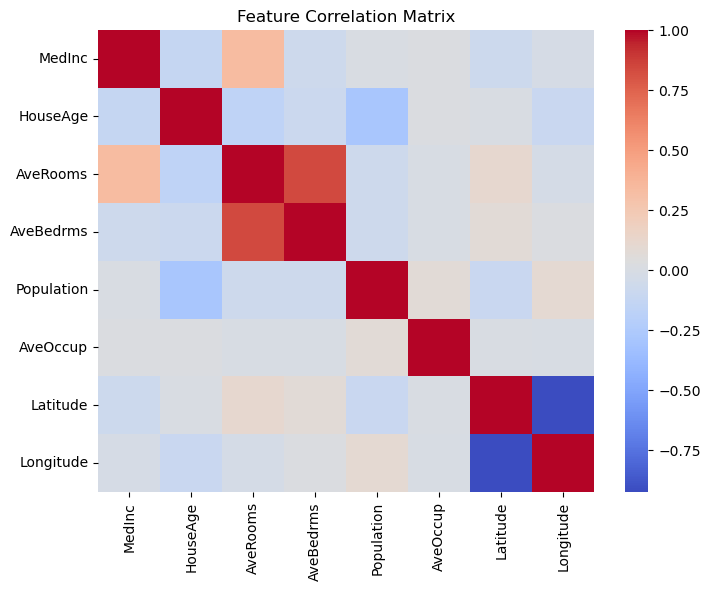

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

## 9. Variance Inflation Factor (VIF)

\[
\text{VIF} = \frac{1}{1 - R^2}
\]

Interpretation:
- VIF ≈ 1 → No multicollinearity
- VIF > 5 → Moderate
- VIF > 10 → High (drop feature)


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(X_train.shape[1])
]

vif_df


,feature,VIF
0,MedInc,11.831609
1,HouseAge,7.155405
2,AveRooms,46.792373
3,AveBedrms,48.332634
4,Population,2.915730
5,AveOccup,1.080609
6,Latitude,560.583263
7,Longitude,641.224254


## 10. Recursive Feature Elimination (RFE)

- Wrapper-based feature selection
- Iteratively removes least important features
- Retains most informative predictors


In [8]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
selected_features


Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')

## 11. Regularization

Used to control:
- Overfitting
- Large coefficients
- Model complexity

Adds penalty to loss function


In [9]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)


ElasticNet(alpha=0.1)

## 12. Hypothesis Testing (Conceptual)

- **H₀**: Feature has no effect on target
- **H₁**: Feature affects target

Using:
- F-test
- p-values
- Confidence level (95%)

Decision:
- p > 0.05 → Accept H₀
- p < 0.05 → Reject H₀


## Summary

- Built Linear Regression using OLS
- Validated assumptions using residual analysis
- Diagnosed multicollinearity using VIF
- Reduced features using RFE
- Controlled overfitting using regularization
- Connected statistics with ML modeling

This case study shows **why diagnostics are critical before trusting a model**.
